In [1]:
# coding: utf-8
import pandas as pd
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import pandas as pd
from io import StringIO
from sklearn import linear_model
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score

/Users/forestlin/miniconda3/envs/my_env_py3/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
def eval_result(y_test,y_pred):
    #评价
    #(1) 评价测度
    # 对于分类问题，评价测度是准确率，但这种方法不适用于回归问题。我们使用针对连续数值的评价测度(evaluation metrics)。
    # 这里介绍3种常用的针对线性回归的测度。
    # 1)平均绝对误差(Mean Absolute Error, MAE)
    # (2)均方误差(Mean Squared Error, MSE)
    # (3)均方根误差(Root Mean Squared Error, RMSE)
    # 这里我使用RMES。
    y_test = list(y_test)
    sum_mean=0
    for i in range(len(y_pred)):
        sum_mean += (y_pred[i] - y_test[i]) ** 2
    sum_error = np.sqrt(sum_mean / len(y_pred))
    # calculate RMSE by hand
    print ("RMSE by hand:",sum_error)
    #做ROC曲线
    plt.figure()
    plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
    plt.plot(range(len(y_pred)),y_test,'r',label="test")
    plt.legend(loc="upper right") #显示图中的标签
    plt.xlabel("the number of sales")
    plt.ylabel('value of sales')
    plt.show()

In [1]:
"""
Neurosurgeon 线性回归模型
"""
# 读入dataframe
data = pd.read_csv('softmax_train_1.csv',encoding='utf-8',sep=',')
data = data[['input_dim','label']]
print(data.shape)
print(data.head())

df_train = data.sample(frac=0.85,random_state=500, axis=0)
df_test = data[~data.index.isin(df_train.index)]

y_train = df_train['label']
y_test = df_test['label']
X_train = df_train.drop('label', axis=1)
X_test = df_test.drop('label', axis=1)

# 建立线性回归模型
regr = linear_model.LinearRegression()
# 拟合
regr.fit(X_train, y_train) 
# 得到直线的斜率、截距
a, b = regr.coef_, regr.intercept_
print(a,b)

# 计算R平方
print('train R^2 ',regr.score(X_train,y_train))
print('dev R^2 ',regr.score(X_test,y_test))
# 计算
y_pred = regr.predict(X_test)

eval_result(y_test,y_pred)

In [2]:
"""
加入动态特征-线性回归

"""
# 读入dataframe
data = pd.read_csv('softmax_train_1.csv',encoding='utf-8',sep=',')

data = data[['input_dim',
             'idle_cpu_times',
             'mem_free',
             'system_cpu_times',
             'cpu_percent',
             'user_cpu_times',
             'label']]

print(data.shape)
print(data.head())

df_train = data.sample(frac=0.85,random_state=500, axis=0)
df_test = data[~data.index.isin(df_train.index)]

y_train = df_train['label']
y_test = df_test['label']
X_train = df_train.drop('label', axis=1)
X_test = df_test.drop('label', axis=1)

# 建立线性回归模型
regr = linear_model.LinearRegression()
# 拟合
regr.fit(X_train, y_train) 
# 得到直线的斜率、截距
a, b = regr.coef_, regr.intercept_
print(a,b)

# 计算R平方
print('train R^2 ',regr.score(X_train,y_train))
print('dev R^2 ',regr.score(X_test,y_test))
# 计算
y_pred = regr.predict(X_test)

eval_result(y_test,y_pred)

In [3]:
"""
加入全部特征-线性回归

"""
# 读入dataframe
data = pd.read_csv('softmax_train_1.csv',encoding='utf-8',sep=',')

print(data.shape)
print(data.head())

df_train = data.sample(frac=0.85,random_state=500, axis=0)
df_test = data[~data.index.isin(df_train.index)]

y_train = df_train['label']
y_test = df_test['label']
X_train = df_train.drop('label', axis=1)
X_test = df_test.drop('label', axis=1)

# 建立线性回归模型
regr = linear_model.LinearRegression()
# 拟合
regr.fit(X_train, y_train) 
# 得到直线的斜率、截距
a, b = regr.coef_, regr.intercept_
print(a,b)

# 计算R平方
print('train R^2 ',regr.score(X_train,y_train))
print('dev R^2 ',regr.score(X_test,y_test))
# 计算
y_pred = regr.predict(X_test)

eval_result(y_test,y_pred)

In [4]:
"""
Neurosurgeon logarithmic回归模型
"""
# 读入dataframe
data = pd.read_csv('softmax_train_1.csv',encoding='utf-8',sep=',')
data = data[['input_dim','label']]
data['label'] = data['label'].apply(lambda x:math.log(x))

print(data.shape)
print(data.head())

df_train = data.sample(frac=0.85,random_state=500, axis=0)
df_test = data[~data.index.isin(df_train.index)]

y_train = df_train['label']
y_test = df_test['label']
X_train = df_train.drop('label', axis=1)
X_test = df_test.drop('label', axis=1)

# 建立线性回归模型
regr = linear_model.LinearRegression()
# 拟合
regr.fit(X_train, y_train) 
# 得到直线的斜率、截距
a, b = regr.coef_, regr.intercept_
print(a,b)

# 计算R平方
print('log train R^2 ',regr.score(X_train,y_train))
print('log dev R^2 ',regr.score(X_test,y_test))

y_pred = regr.predict(X_test)
eval_result(y_test,y_pred)

y_test = [ math.exp(x) for x in y_test ]
y_pred = [ math.exp(x) for x in y_pred ]
print('dev R^2',r2_score(y_test,y_pred))

eval_result(y_test,y_pred)

In [5]:
"""
LightGBM
"""
# 读入dataframe
data = pd.read_csv('softmax_train_1.csv',encoding='utf-8',sep=',')

print(data.shape)
print(data.head())

df_train = data.sample(frac=0.85,random_state=500, axis=0)
df_test = data[~data.index.isin(df_train.index)]

y_train = df_train['label']
y_test = df_test['label']
X_train = df_train.drop('label', axis=1)
X_test = df_test.drop('label', axis=1)


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=40)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)


from sklearn.metrics import r2_score

print('R^2',r2_score(y_test,y_pred))


eval_result(y_test,y_pred)

(9, 1)


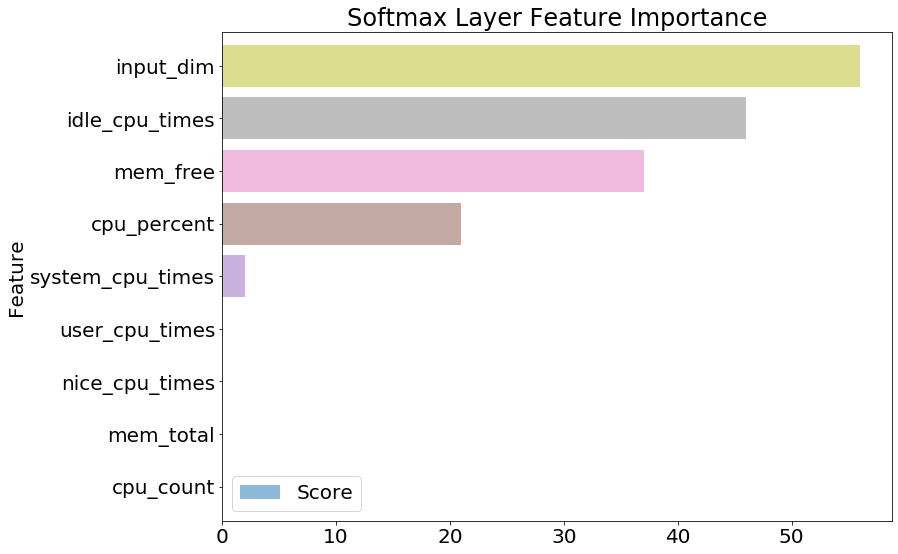

In [4]:
def draw_barh_pic(data,pic_name,index_name,y):
    data = data.set_index(index_name)
    print(data.shape)
    fig = data.plot.barh(
        alpha=0.5,
        y=y,
        figsize=(12, 9), 
        title=pic_name,
        width=0.8,
        fontsize=20)
    fig.axes.title.set_size(24)
    fig.legend(fontsize=20)
    #设置横纵坐标的名称以及对应字体格式
    font = {'size' : 20}
    fig.axes.set_ylabel('Feature',font)
    
names, importances = zip(*(sorted(zip( gbm.feature_name(), gbm.feature_importance()),
                                  key=lambda x: x[1])))

df_dict = {'Feature':names,'Score':importances}
df = pd.DataFrame(df_dict)
# 画图
pic_name = 'Softmax Layer Feature Importance'
draw_barh_pic(df,pic_name,
             index_name='Feature',y='Score')